In [22]:
import matplotlib.pyplot as plt
import numpy as np

#Initialize  t, y and arrays

In [29]:
import math

dt = .01
iterations = 1790

class Pendulum:
    def __init__(self):
        self.vel = [0,-.03]
        self.theta = [15,14.99]
        self.t = [0,.01]
k = 3.5


In [30]:
def cal_accel(theta):
    accel = -(k**2)*math.sin(math.radians(theta))
    #print( "Acceleration: " + str(accel))
    return accel

def bashforthadams(style, pend):
    if style == "vel":
        pend.vel.append(pend.vel[-1] + 1.5*dt*cal_accel(pend.theta[-1]) - 0.5*dt*cal_accel(pend.theta[-2]))
        #pend.vel.append(pend.vel[-1] - dt*cal_accel(pend.theta[-1]))
    if style == "pos":
        pend.theta.append(pend.theta[-2] + 1.5*dt*pend.vel[-2] - 0.5*dt*pend.vel[-3])
        #pend.theta.append(pend.theta[-1] + dt*pend.vel[-1])
        
def run_oscillator(pend):    
    for i in range (iterations):
        #ok = input("Vel: " + str(pend.curr_vel) + "\nPos: " + str(pend.curr_pos))
        bashforthadams("vel", pend)
        bashforthadams("pos", pend)
        pend.t.append(pend.t[-1]+dt)
       

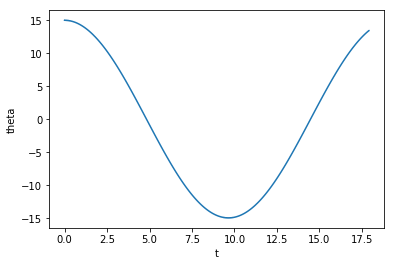

In [31]:
pend = Pendulum()
run_oscillator(pend)

plt.plot(pend.t, pend.theta)
plt.xlabel('t')
plt.ylabel('theta')
plt.show()

In [32]:
def solve_analytical_small():
    timestep = dt
    pend_small = Pendulum()
    t = 0
    for i in range(iterations):
            t += timestep
            pend_small.theta.append(pend_small.theta[0]*math.cos(k*t))
            pend_small.vel.append(-k*pend_small.theta[0]*math.sin(k*t))
            pend_small.t.append(t)
    return pend_small

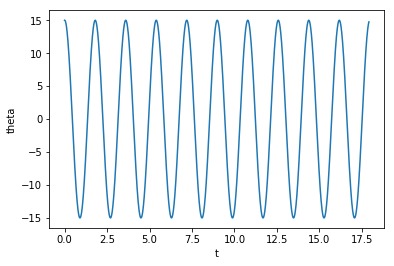

In [33]:
pend_small = solve_analytical_small()def solve_analytical_small():
    timestep = dt
    pend_small = Pendulum()
    t = 0
    for i in range(iterations):
            t += timestep
            pend_small.theta.append(pend_small.theta[0]*math.cos(k*t))
            pend_small.vel.append(-k*pend_small.theta[0]*math.sin(k*t))
            pend_small.t.append(t)
    return pend_small
plt.plot(pend.t, pend_small.theta)
plt.xlabel('t')
plt.ylabel('theta')
plt.show()

In [28]:
err = [];
for i in range(iterations+2):
    err.append(pend.theta[i] - pend_small.theta[i])

